**INF2178H Group 14 Final Project** - **Factorial Analysis for Coronary Heart Disease**

1. Import Data & Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

In [ ]:
# import dataset and only look at the 5 sociological variables and outcome variable
df = pd.read_csv('framingham.csv')
df = df[['male','age', 'education', 'currentSmoker', 'BMI', 'TenYearCHD']]
df = df.dropna()
df.head()

male  age  education  currentSmoker    BMI  TenYearCHD
0     1   39        4.0              0  26.97           0
1     0   46        2.0              0  28.73           0
2     1   48        1.0              1  25.34           0
3     0   61        3.0              1  28.58           1
4     0   46        3.0              1  23.10           0

2. Descriptive Analysis

In [ ]:
clean_df = df

In [ ]:
# convert to categorical type
clean_df['male'] = clean_df['male'].astype('category')
clean_df['education'] = clean_df['education'].astype('category')
clean_df['currentSmoker'] = clean_df['currentSmoker'].astype('category')
clean_df['TenYearCHD'] = clean_df['TenYearCHD'].astype('category')

In [ ]:
# describe all numeric features
clean_df.describe()

age          BMI
count  4117.000000  4117.000000
mean     49.540442    25.777345
std       8.548844     4.082977
min      32.000000    15.540000
25%      42.000000    23.060000
50%      49.000000    25.380000
75%      56.000000    27.990000
max      70.000000    56.800000

In [ ]:
#!pip install plotnine
from plotnine import *
from plotnine.data import *

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


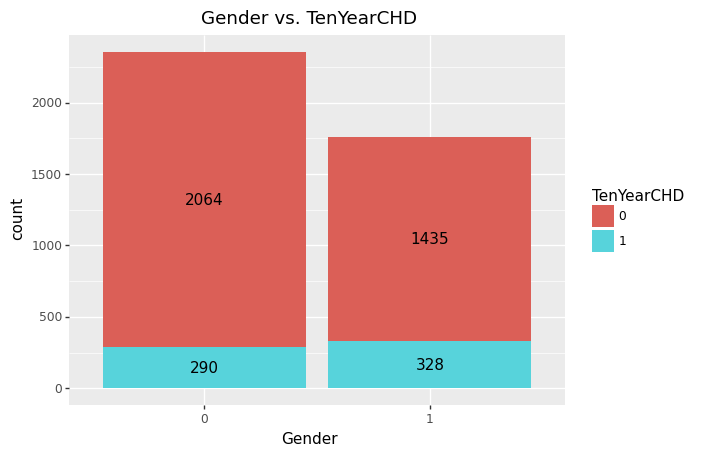

<ggplot: (8748975352593)>

In [ ]:
#gender
p1_1=(ggplot(clean_df,aes('male',fill='TenYearCHD')) 
 + geom_bar() 
 + geom_text(aes(label='stat(count)'), stat='count', position=position_stack(vjust=0.5))
+ ggtitle('Gender vs. TenYearCHD')
 + labs(x='Gender'))
p1_1

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


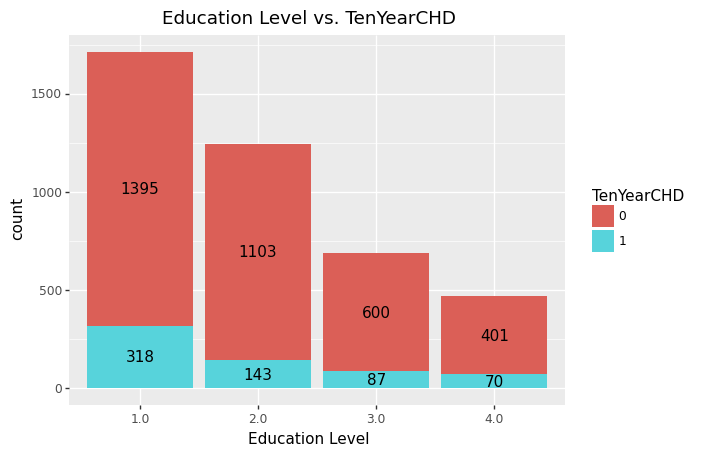

<ggplot: (8748953618437)>

In [ ]:
#education
p1_2=(ggplot(clean_df,aes('education',fill='TenYearCHD')) 
 + geom_bar() 
 + geom_text(aes(label='stat(count)'), stat='count', position=position_stack(vjust=0.5))
+ ggtitle('Education Level vs. TenYearCHD')
 + labs(x='Education Level'))
p1_2

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


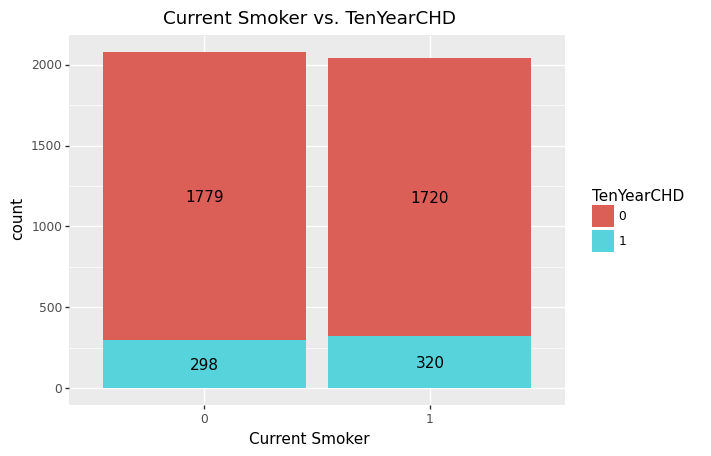

<ggplot: (8748944388549)>

In [ ]:
# smoker
p1_3=(ggplot(clean_df,aes('currentSmoker',fill='TenYearCHD')) 
 + geom_bar() 
 + geom_text(aes(label='stat(count)'), stat='count', position=position_stack(vjust=0.5))
+ ggtitle('Current Smoker vs. TenYearCHD')
 + labs(x='Current Smoker'))
p1_3

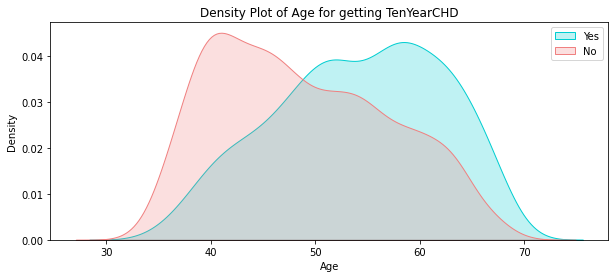

In [ ]:
# age
plt.figure(figsize=(10,4))
ax = sns.kdeplot(clean_df["age"][clean_df.TenYearCHD == 1], color="darkturquoise", shade=True)
sns.kdeplot(clean_df["age"][clean_df.TenYearCHD == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density Plot of Age for getting TenYearCHD')
ax.set(xlabel='Age')
#plt.xlim(-10,85)
plt.show()

In [ ]:
group1 = clean_df[clean_df['TenYearCHD']==0]['age']
group2 = clean_df[clean_df['TenYearCHD']==1]['age']
#find variance for each group
print(np.var(group1), np.var(group2))
#perform two sample t-test with unequal variances
sp.ttest_ind(a=group1, b=group2, equal_var= False)

70.37692376240062 63.540704433342796


Ttest_indResult(statistic=-15.37856796808011, pvalue=2.0131011775289885e-47)

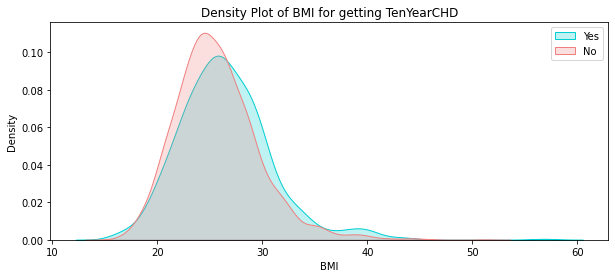

In [ ]:
# bmi
plt.figure(figsize=(10,4))
ax = sns.kdeplot(clean_df["BMI"][clean_df.TenYearCHD == 1], color="darkturquoise", shade=True)
sns.kdeplot(clean_df["BMI"][clean_df.TenYearCHD == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density Plot of BMI for getting TenYearCHD')
ax.set(xlabel='BMI')
#plt.xlim(-10,85)
plt.show()

In [ ]:
group1 = clean_df[clean_df['TenYearCHD']==0]['BMI']
group2 = clean_df[clean_df['TenYearCHD']==1]['BMI']
#find variance for each group
print(np.var(group1), np.var(group2))
#perform two sample t-test with unequal variances
sp.ttest_ind(a=group1, b=group2, equal_var= False)

15.95184454595734 20.12613703354597


Ttest_indResult(statistic=-4.31240579767166, pvalue=1.8169013771498368e-05)

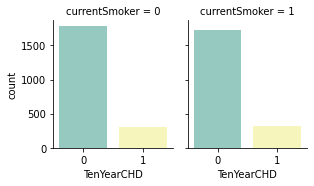

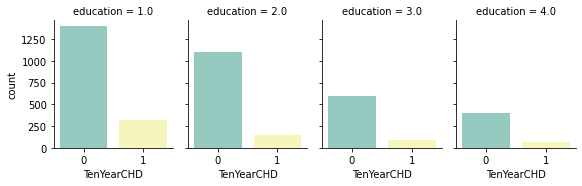

In [ ]:
g = sns.catplot(x='TenYearCHD', col='male',col_wrap=2,
                data=df, kind='count', palette='Set3',
                height=2.5, aspect=.8)

g = sns.catplot(x='TenYearCHD', col='currentSmoker',col_wrap=4,
               data=df, kind='count',palette='Set3',
                height=2.5, aspect=.8)

g = sns.catplot(x='TenYearCHD', col='education',col_wrap=4,
                data=df, kind='count', palette='Set3',
                height=2.5, aspect=.8)

In [ ]:
#violin plot - age
sns.catplot(x="education", y="age", row = 'currentSmoker', data=df, 
            dodge=True, hue='male', kind='violin', palette='Set3', aspect=3)
plt.show()

In [ ]:
#violin plot - bmi
sns.catplot(x="education", y="BMI", row = 'currentSmoker', data=df, 
            dodge=True, hue='male', kind='violin', palette='Set3', aspect=3)
plt.show()

3. RQ1

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# import and clean data (same methods as above)
df = pd.read_csv('framingham.csv')
df = df[['male','age', 'education', 'currentSmoker', 'BMI', 'TenYearCHD']]
df = df.dropna()
df.head()

male  age  education  currentSmoker    BMI  TenYearCHD
0     1   39        4.0              0  26.97           0
1     0   46        2.0              0  28.73           0
2     1   48        1.0              1  25.34           0
3     0   61        3.0              1  28.58           1
4     0   46        3.0              1  23.10           0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4239
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4117 non-null   int64  
 1   age            4117 non-null   int64  
 2   education      4117 non-null   float64
 3   currentSmoker  4117 non-null   int64  
 4   BMI            4117 non-null   float64
 5   TenYearCHD     4117 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 225.1 KB


In [ ]:
#Implement GLM model
import statsmodels.formula.api as smf
formula = 'TenYearCHD ~ male + age + education + BMI + currentSmoker'
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 4117
Model:                            GLM   Df Residuals:                     4111
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1606.1
Date:                Sat, 10 Apr 2021   Deviance:                       3212.2
Time:                        23:58:24   Pearson chi2:                 4.00e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.1132      0.458    -15.516

In [ ]:
#PREPARING THE Logistic MODEL
X = df[['male','age','BMI','currentSmoker','education']]
print(X)

      male  age    BMI  currentSmoker  education
0        1   39  26.97              0        4.0
1        0   46  28.73              0        2.0
2        1   48  25.34              1        1.0
3        0   61  28.58              1        3.0
4        0   46  23.10              1        3.0
...    ...  ...    ...            ...        ...
4235     0   48  22.00              1        2.0
4236     0   44  19.16              1        1.0
4237     0   52  21.47              0        2.0
4238     1   40  25.60              0        3.0
4239     0   39  20.91              1        3.0

[4117 rows x 5 columns]


In [ ]:
y = df['TenYearCHD']
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4117, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
#I have split the model in 30-70 test and train size with a given random state so that the output doesnt differ everytime I execute the program
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter =1000)
model.fit(X_train, y_train)
y_pred =model.predict(X_test)
print('Logistic Regression equation, {} + {}'.format(model.coef_ , model.intercept_))

Logistic Regression equation, [[ 0.52269359  0.07853298  0.01693401  0.33486344 -0.05882835]] + [-6.55196952]


In [ ]:
#confusion matrix 
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[1036    1]
 [ 198    1]]


In [ ]:
#check the model accuracy
model.score(X_test,y_test)

0.8389967637540453

In [ ]:
#Measure of accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score 
from sklearn.metrics import roc_curve, roc_auc_score
print('accuracy score is {:4f}'.format(accuracy_score(y_test,y_pred)))
print('Precision score: ', precision_score(y_test, y_pred,average='micro'))
print('Recall score: ', recall_score(y_test, y_pred,average='micro'))

accuracy score is 0.838997
Precision score:  0.8389967637540453
Recall score:  0.8389967637540453


In [ ]:
#checking AUC under ROC curve
y_score = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

roc_auc_score for Logistic Regression:  0.7046030538420162


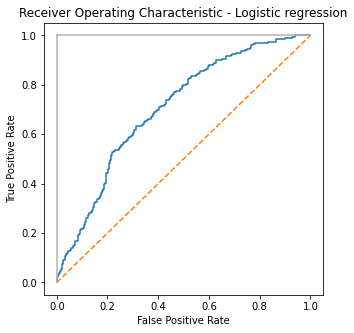

In [ ]:
# Plotting ROC Curve
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

4. RQ2

4.1 RQ2.1: Will smoking increase CHD risk? (Two Sample t-Test)

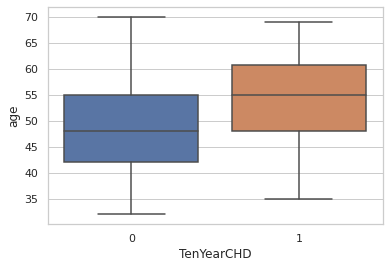

In [ ]:
# Step 1: Data Preparation

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="TenYearCHD", y="age", data=df)

In [ ]:
# convert Age from continuous variables to categorical variables
df['age'] = pd.cut(df.age, bins=[0,44,60,99],labels=['<45','45-60','>60'])

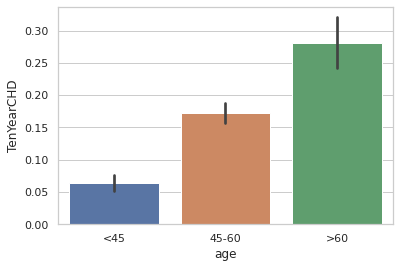

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="age", y="TenYearCHD", data=df)

In [ ]:
# convert other categorical variables from numerical to string
df['male'] = df['male'].astype(str)
df['education'] = df['education'].astype(str)
df['currentSmoker'] = df['currentSmoker'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4239
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   male           4117 non-null   object  
 1   age            4117 non-null   category
 2   education      4117 non-null   object  
 3   currentSmoker  4117 non-null   object  
 4   BMI            4117 non-null   float64 
 5   TenYearCHD     4117 non-null   int64   
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 357.1+ KB


In [ ]:
df_smk = df[['currentSmoker','TenYearCHD']]
df_smk.head()

currentSmoker  TenYearCHD
0             0           0
1             0           0
2             1           0
3             1           1
4             1           0

In [ ]:
# devide the data into smokers and nonsmokers
smoker = df_smk['TenYearCHD'][df_smk['currentSmoker']=='1']
nonsmoker = df_smk['TenYearCHD'][df_smk['currentSmoker']=='0']

In [ ]:
# Step 2: Check Assumption
# Assumption 3: Normality

# Check normality with Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(smoker)
print('p=%.3f' % p)
stat, p = shapiro(nonsmoker)
print('p=%.3f' % p)

p=0.000
p=0.000


In [ ]:
# Since both p-values are less than 0.001, we reject the H0
# and conclude that the samples are not normally distributed
# Since this project is more to practice, we will continue with next steps

# Assumption 4: Homogeneity of Variance
# check equal variance assumption with Levene's Test
from scipy.stats import levene
stat, p = levene(smoker, nonsmoker)
p

0.22933256101799357

In [ ]:
# p-value > .05 suggests we keep the null hypothesis that smokers and nonsmokers has equal variance

In [ ]:
# Step 3: Check Power for Two Sample t-Test

# compute the relevant effect size metrics Cohen’s d
# create a function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# Create a function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    return ((u1 - u2) / s_pooled)

In [ ]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = Cohens_d(smoker,nonsmoker)
alpha = 0.05
power = 0.8
ratio_ =1

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Effect size is 0.037476149602142524
Sample Size: 11177.997


In [ ]:
power = analysis.solve_power(effect_size, power=None, nobs1=len(df_smk['TenYearCHD']), ratio=ratio_, alpha=alpha)
print('Power: %.3f' % power)

Power: 0.398


In [ ]:
# The effect size is less than 0.04, indicating the difference in the group means are quite small
# We would need 11,178 samples to generate enough power, however this dataset only collected 4,117 samples
# which only gives us statistical power at 0.398, meaning this study is underpowered
# Due to the purpose of this project is to practice, we will continue with next steps

# two-sample t-test with equal variance
!pip install bioinfokit
from bioinfokit.analys import stat

res = stat()
res.ttest(df=df_smk, xfac="currentSmoker", res="TenYearCHD", test_type=2)
print(res.summary)

     |████████████████████████████████| 92kB 8.4MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.2-cp37-none-any.whl size=56174 sha256=382d39d7c8351fe849a8d7ac3ab7e9a4a22a37d1689a19a078098f75346202ea
  Stored in directory: /root/.cache/pip/wheels/8e/3c/1d/369f28890a2139410deef43f69444d49bea2c37d3c3904a0fe
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=9aed2c8398f5740deaa3a81bdd22038c72fc9d096b30e23925083e8009a04a53
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText

Two sample t-test with equal variance

------------------  -------------
Mean diff             -0.0133866
t                     -1.20226
Std Error              0.0111345
df                  4115
P-value (one-tail)     0.114666
P-value (two-tail)     0.229333
Lower 95.0%           -0.0352163
Upper 95.0%            0.00844311
------------------  -------------

Parameter es

In [ ]:
# Conclusion: with p-value > .05, we fail to reject the null hypothesis and conclude that 
# there is NO difference in CHD risk between smokers and non-smokers

# interpretation & DoF: 
# https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/

4.2 RQ2.2: 

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns

In [ ]:
!pip install scikit_posthocs
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

     |████████████████████████████████| 51kB 5.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-cp37-none-any.whl size=37886 sha256=e12db41ef636f230532da6d78d363f946167ab1fbdfa074bad72d49b1fa60c66
  Stored in directory: /root/.cache/pip/wheels/00/0f/56/897c22820a48a74f50f1a85faaa4b133bb8865e8b094b596f5
Successfully built scikit-posthocs


In [ ]:
clean_df_1 = clean_df # do not delete

In [ ]:
clean_df_1['TenYearCHD'] = clean_df_1['TenYearCHD'].astype('float')

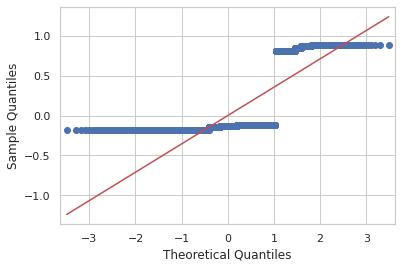

In [ ]:
# step 1: check assumption
# normality
lm_edu = sfa.ols('TenYearCHD ~ C(education)', data=clean_df_1).fit()
res_1 = lm_edu.resid
fig = sm.qqplot(res_1, line = 's')
plt.show()

In [ ]:
# homogeneity of variance
stats.levene(clean_df_1['TenYearCHD'][clean_df_1['education'] == 1.0],
             clean_df_1['TenYearCHD'][clean_df_1['education'] == 2.0],
             clean_df_1['TenYearCHD'][clean_df_1['education'] == 3.0],
             clean_df_1['TenYearCHD'][clean_df_1['education'] == 4.0])

LeveneResult(statistic=10.781829809456433, pvalue=4.6969149191647395e-07)

In [ ]:
# step2 : power analysis
!pip install pingouin

     |████████████████████████████████| 204kB 13.8MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-cp37-none-any.whl size=203396 sha256=76e9c1aa270ff565dbb5e431df7284b2dcbd7eb3c0ef120fd375acb5d8bc4652
  Stored in directory: /root/.cache/pip/wheels/e6/f4/06/b5046209e6c0d96b4dea243c45e926b5c0dd88e23b01c45f92
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=e70b6c3b6f5af11642150aeb65450b570edaad554310553918586c9b2f4a7273
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils


In [ ]:
import pingouin as pg
aov_1 = pg.anova(data=clean_df_1, dv='TenYearCHD', between='education',
               detailed=True)
aov_1

Source          SS    DF        MS         F         p-unc       np2
0  education    4.098308     3  1.366103  10.78183  4.696915e-07  0.007803
1     Within  521.134143  4113  0.126704       NaN           NaN       NaN

In [ ]:
esq_1 = aov_1['np2'][0]
esq_1

0.007802845266059994

In [ ]:
import statsmodels.stats.power as smp

In [ ]:
# how many samples do we need in total:
smp.FTestAnovaPower().solve_power(effect_size=esq_1, alpha=0.05, power=0.8, k_groups=4)

179073.49433958417

In [ ]:
# step 3: perform one-way anova
lm_edu = sfa.ols('TenYearCHD ~ C(education)', data=clean_df_1).fit()
# print summary of linear regression
(lm_edu.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TenYearCHD   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     10.78
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           4.70e-07
Time:                        23:59:02   Log-Likelihood:                -1587.1
No. Observations:                4117   AIC:                             3182.
Df Residuals:                    4113   BIC:                             3208.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1856      0.009     21.585      0.000       0.169       0.203
C(education)[T.2.0]    -0.0709      0.013     -5.347      0.000      -0.097      -0.045
C(education)[T.3.0]    -0.0590      0.016     -3.670      0.000      -0.091      -0.027
C(education)[T.4.0]    -0.0370      0.019     -1.999      0.046      -0.073      -0.001
==============================================================================
Omnibus:                     1348.386   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3133.779
Skew:                           1.936   Prob(JB):                         0.00
Kurtosis:                       4.810   Cond. No.                         4.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Show Anova table
anova_table_edu = sa.stats.anova_lm(lm_edu)
print(anova_table_edu)

                  df      sum_sq   mean_sq         F        PR(>F)
C(education)     3.0    4.098308  1.366103  10.78183  4.696915e-07
Residual      4113.0  521.134143  0.126704       NaN           NaN


In [ ]:
#step 4: post-hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [ ]:
# compare the TenYearCHD between each education group, using 95% confidence interval 
mc = MultiComparison(clean_df_1['TenYearCHD'], clean_df_1['education'])
tukey_result = mc.tukeyhsd(alpha=0.05)

print(tukey_result)
print('Unique education groups: {}'.format(mc.groupsunique))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.0709  0.001 -0.1049 -0.0368   True
   1.0    3.0   -0.059 0.0014 -0.1003 -0.0177   True
   1.0    4.0   -0.037 0.1885 -0.0846  0.0106  False
   2.0    3.0   0.0119 0.8913 -0.0316  0.0553  False
   2.0    4.0   0.0339  0.294 -0.0156  0.0833  False
   3.0    4.0    0.022 0.7057 -0.0327  0.0767  False
----------------------------------------------------
Unique education groups: [1. 2. 3. 4.]


4.3 RQ2.3: Does age impact CHD risk differently across genders? (Two-way ANOVA)

In [ ]:
!pip install researchpy
!pip install pingouin
import researchpy as rp
import pingouin as pg

# Step 1: Import Data
df_as = df[['male','age','TenYearCHD']]
df_as.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4239
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   male        4117 non-null   object  
 1   age         4117 non-null   category
 2   TenYearCHD  4117 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 260.6+ KB


In [ ]:
rp.summary_cat(df_as[["male", "age"]])

Variable Outcome  Count  Percent
0     male       0   2354    57.18
1                1   1763    42.82
2      age   45-60   2172    52.76
3              <45   1393    33.84
4              >60    552    13.41

In [ ]:
# Step 2: Check Assumptions

# Assumption 1: Normality in outcomes
a1 = df_as['TenYearCHD'][df_as['age']=='<45'][df_as['male']=='0']
k_a1, p_a1 = stats.normaltest(a1)
print(p_a1)

a2 = df_as['TenYearCHD'][df_as['age']=='<45'][df_as['male']=='1']
k_a2, p_a2 = stats.normaltest(a2)
print(p_a2)

b1 = df_as['TenYearCHD'][df_as['age']=='45-60'][df_as['male']=='0']
k_b1, p_b1 = stats.normaltest(b1)
print(p_b1)

b2 = df_as['TenYearCHD'][df_as['age']=='45-60'][df_as['male']=='1']
k_b2, p_b2 = stats.normaltest(b2)
print(p_b2)

c1 = df_as['TenYearCHD'][df_as['age']=='>60'][df_as['male']=='0']
k_c1, p_c1 = stats.normaltest(c1)
print(p_c1)

c2 = df_as['TenYearCHD'][df_as['age']=='>60'][df_as['male']=='1']
k_c2, p_c2 = stats.normaltest(c2)
print(p_c2)

5.780363689173298e-152
3.335757925884713e-83
6.584106267984708e-105
1.10694799750011e-37
3.0935017419735824e-15
3.34178629649423e-160


In [ ]:
# The above p-values suggest that the outcomes are NOT normally distributed
# Due to the purpose of this project is practice, we will continue with next steps

In [ ]:
# Assumption 2: Equality of variances across groups

# check equal variance assumption with Levene's Test
stat, p = levene(a1, a2, b1, b2, c1, c2)
p

6.9432042771100015e-43

In [ ]:
# The above p-values suggest that there is NOT equality of variances across groups
# Due to the purpose of this project is practice, we will continue with next steps

# Assumption 3: IID: independent and identically distributed errors
# The data is retrived from Kaggle, and we assume the IID assumption is true

In [ ]:
# Step 3: Power Analysis

aov = pg.anova(dv='TenYearCHD', between=['male','age'],data=df_as,effsize='n2')
aov

Source          SS      DF         MS          F         p-unc        n2
0        male    4.652120     1.0   4.652120  38.296849  6.669761e-10  0.008846
1         age   21.511912     2.0  10.755956  88.544412  2.243124e-38  0.040905
2  male * age    0.353594     2.0   0.176797   1.455414  2.334239e-01  0.000672
3    Residual  499.384815  4111.0   0.121475        NaN           NaN       NaN

In [ ]:
print('Effect size (eta squared) is: %.4f' % aov['n2'][2])

from pingouin import power_anova
n = power_anova(eta=aov['n2'][2], k=6, power=0.80)
print('Sample Size of %.2f' % n, 'is required to achieve 0.8 power')

Effect size (eta squared) is: 0.0007
Sample Size of 3178.53 is required to achieve 0.8 power


In [ ]:
# The effect size is negligible
# To generate 0.8 power, 3178 observations are required for each of the 6 groups
# Since our sample size is only 4117, this experiment is underpowered

In [ ]:
pw = power_anova(eta=aov['n2'][2], k=6, n=len(df_as['TenYearCHD'])/6)
print('Power: %.2f' % pw)

Power: 0.21


In [ ]:
# Step 4: Compute Two-way ANOVA

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults

# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='TenYearCHD ~ male * age', data=df_as).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=3))

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     42.56
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           6.94e-43
Time:                        23:59:08   Log-Likelihood:                -1499.4
No. Observations:                4117   AIC:                             3011.
Df Residuals:                    4111   BIC:                             3049.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [ ]:
# The p-value of the interaction is higher than 0.05, we fail to reject the null hypothesis
# and conclude that there is no interaction between male and age

In [ ]:
# Step 5: Draw Interaction Plots
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
df_as.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4239
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   male        4117 non-null   object  
 1   age         4117 non-null   category
 2   TenYearCHD  4117 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 260.6+ KB


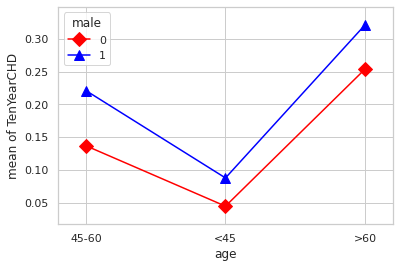

In [ ]:
fig = interaction_plot(df_as['age'].astype(str), df_as['male'].astype(str), df_as.TenYearCHD, 
                      colors=['red','blue'], markers=['D','^'], ms=10)

In [ ]:
# The interaction plot indicates that the interaction is not statistically significant
# This can be considered as an additive model

4.4 RQ2.4: 

In [ ]:
# convert BMi from continuous variables to categorical variables
def bmi_grp(a):
    if a < 25:
        return '1_not overweight'
    elif a >= 25 and a <=30:
        return '2_overweight'
    else:
        return '3_obese'

In [ ]:
clean_df_2 = clean_df_1 # do not delete
clean_df_2['BMIn'] = clean_df_2['BMI'].apply(bmi_grp)

In [ ]:
clean_df_2['BMIn'] = clean_df_2['BMIn'].astype('category')

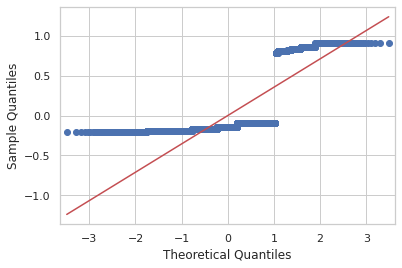

In [ ]:
# step 1: assumption checking
# noramlity
lm_bmi_gender = sfa.ols('TenYearCHD ~ C(BMIn) + C(male) + C(BMIn):C(male)', data=clean_df_2).fit()
res_2 = lm_bmi_gender.resid
fig = sm.qqplot(res_2, line = 's')
plt.show()

In [ ]:
!pip install bioinfokit

In [ ]:
# homogeneity of variance
from bioinfokit.analys import stat 
res_3 = stat()
res_3.levene(df=clean_df_2, res_var='TenYearCHD', xfac_var=['BMIn', 'male'])
res_3.levene_summary

Parameter    Value
0      Test statistics (W)  10.0613
1  Degrees of freedom (Df)   5.0000
2                  p value   0.0000

In [ ]:
# step 2:power analysis
# Two-way ANOVA with unbalanced design (requires statsmodels)
aov_2 = pg.anova(data = clean_df_2, dv='TenYearCHD', between=['BMIn', 'male'],effsize="n2")
aov_2

Source          SS      DF        MS          F         p-unc        n2
0         BMIn    2.117780     2.0  1.058890   8.389365  2.311853e-04  0.004038
1         male    3.240391     1.0  3.240391  25.672941  4.222221e-07  0.006178
2  BMIn * male    0.249707     2.0  0.124853   0.989187  3.719674e-01  0.000476
3     Residual  518.882834  4111.0  0.126218        NaN           NaN       NaN

In [ ]:
esq_2 = aov_2['n2'][2]

In [ ]:
# how many samples do we need in total:
smp.FTestAnovaPower().solve_power(effect_size=esq_2, alpha=0.05, power=0.8, k_groups=6)

56592309.30250397

In [ ]:
# step3: perform two-way anova
lm_bmi_gender = sfa.ols('TenYearCHD ~ C(BMIn) + C(male) + C(BMIn):C(male)', data=clean_df_2).fit()
(lm_bmi_gender.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TenYearCHD   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     10.06
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           1.37e-09
Time:                        23:59:12   Log-Likelihood:                -1578.2
No. Observations:                4117   AIC:                             3168.
Df Residuals:                    4111   BIC:                             3206.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.0962      0.010      9.524      0.000       0.076       0.116
C(BMIn)[T.2_overweight]                  0.0488      0.016      3.034      0.002       0.017       0.080
C(BMIn)[T.3_obese]                       0.0780      0.023      3.456      0.001       0.034       0.122
C(male)[T.1]                             0.0753      0.017      4.383      0.000       0.042       0.109
C(BMIn)[T.2_overweight]:C(male)[T.1]    -0.0291      0.024     -1.198      0.231      -0.077       0.019
C(BMIn)[T.3_obese]:C(male)[T.1]         -0.0398      0.036     -1.095      0.274      -0.111       0.031
==============================================================================
Omnibus:                     1335.992   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3082.410
Skew:                           1.922   Prob(JB):                         0.00
Kurtosis:                       4.786   Cond. No.                         9.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Show Anova table
anova_table_bmi_gender = sa.stats.anova_lm(lm_bmi_gender, typ=2)
print(anova_table_bmi_gender)

                     sum_sq      df          F        PR(>F)
C(BMIn)            2.117780     2.0   8.389365  2.311853e-04
C(male)            3.240391     1.0  25.672941  4.222221e-07
C(BMIn):C(male)    0.249707     2.0   0.989187  3.719674e-01
Residual         518.882834  4111.0        NaN           NaN


In [ ]:
# interaction plot
from statsmodels.graphics.factorplots import interaction_plot

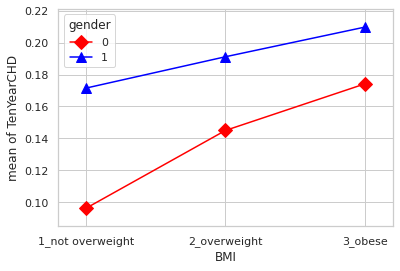

In [ ]:
fig = interaction_plot(x=clean_df_2['BMIn'].astype(str), trace=clean_df_2['male'].astype(str), response=clean_df_2['TenYearCHD'], 
    colors=['red','blue'], markers=['D','^'], ms=10, xlabel = 'BMI',legendtitle = 'gender')
plt.show()

In [ ]:
# step 4: post-hoc on main effect BMI
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect BMI
res.tukey_hsd(df=clean_df_2, res_var='TenYearCHD', xfac_var='BMIn', anova_model='TenYearCHD~C(BMIn)+C(male)+C(BMIn):C(male)')
res.tukey_summary

group1            group2      Diff  ...     Upper   q-value   p-value
0      2_overweight  1_not overweight  0.047170  ...  0.074962  5.627735  0.001000
1      2_overweight           3_obese  0.018957  ...  0.060820  1.501478  0.536213
2  1_not overweight           3_obese  0.066127  ...  0.107532  5.295559  0.001000

[3 rows x 7 columns]